# Proyecto Final Big Data & Business Analytics  
## Fashion Retail Sales (E-commerce Moda)  
### Exploración de Datos (EDA) – Notebook 01  
**Autora:** Agustina Arrospide  
**Máster CEI**  
**Fecha:** 26 oct 2025

## Descripción del dataset

| Columna                  | Tipo                | Descripción                                                                 |
|--------------------------|---------------------|-----------------------------------------------------------------------------|
| `customer_reference_id`  | String              | Identificador anónimo del cliente/usuario.                                  |
| `item_purchased`         | Categórico          | Producto adquirido (SKU o nombre de artículo).                              |
| `purchase_amount_usd`    | Float (USD)         | Importe de la transacción en dólares estadounidenses.                       |
| `date_purchase`          | Fecha (DD/MM/YYYY)  | Fecha de la compra registrada en el pedido.                                 |
| `review_rating`          | Entero (1–5)        | Puntuación de satisfacción declarada por el cliente (si aplica).            |
| `payment_method`         | Categórico          | Método de pago utilizado (Tarjeta, Efectivo, etc.).                         |

> **Tamaño**: 3,400 filas × 6 columnas  
> **Cobertura temporal**: 2022-10-02 – 2023-10-01

## Objetivos

1. Comprender la estructura y calidad del dataset  
2. Detectar sesgos, valores atípicos y patrones clave  
3. Identificar variables candidatas para el modelo de predicción  
4. Respaldar hallazgos con visualizaciones para la memoria y el dashboard

In [1]:
# Imports y configuración
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


pd.set_option("display.max_columns", None)

# --- Rutas seguras y portables ---
# Detectar carpeta actual del notebook
BASE_DIR = Path.cwd()

# Subir un nivel hasta la carpeta raíz del proyecto
ROOT_DIR = BASE_DIR.parent

# Ruta completa al CSV (sin exponer disco ni usuario)
RAW_PATH = ROOT_DIR / "data" / "raw" / "Fashion_Retail_Sales.csv"

# --- Cargar el dataset ---
df = pd.read_csv(RAW_PATH)

print(f"✅ Dataset cargado correctamente ({df.shape[0]} filas, {df.shape[1]} columnas)")
df.head()

✅ Dataset cargado correctamente (3400 filas, 6 columnas)


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


**Interpretación**  
- **Carga correcta del dataset** y normalización de columnas si aplica.  
- Se confirman rutas y formatos esperados (fechas con `dayfirst=True` si procede).  
- Esta celda establece la base para todo el análisis posterior.

Se confirma la carga correcta del dataset fuente. A partir de aquí se trabaja con el archivo tal como viene del origen
para caracterizar su contenido y calidad antes de aplicar transformaciones.

In [2]:
print("Dimensiones:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nResumen estadístico:")
display(df.describe(include="all"))

Dimensiones: (3400, 6)

Tipos de datos:
Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object

Resumen estadístico:


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
count,3400.000000,3400,2750.000000,3400,3076.000000,3400
unique,NaN,50,NaN,365,NaN,2
top,NaN,Belt,NaN,22-09-2023,NaN,Credit Card
freq,NaN,90,NaN,17,NaN,1770
mean,4039.660588,NaN,156.709818,NaN,2.999057,NaN
std,48.122583,NaN,419.536669,NaN,1.156505,NaN
min,3957.000000,NaN,10.000000,NaN,1.000000,NaN
25%,3997.000000,NaN,57.000000,NaN,2.000000,NaN
50%,4040.000000,NaN,110.000000,NaN,3.000000,NaN
75%,4081.000000,NaN,155.750000,NaN,4.000000,NaN


**Interpretación**  
- **Estructura:** dimensiones y tipos detectados concuerdan con el esquema esperado (6 columnas).  
- `describe()` revela **sesgo a la derecha** en `purchase_amount_usd` (media > mediana).  
- No se observan valores infinitos; rango de montos consistente con retail de moda.

Los resultados muestran número total de filas y columnas, tipos por variable y estadísticos básicos. Esta visión general
permite identificar posibles incoherencias (por ejemplo, fechas como texto) y rangos de valores.

In [3]:
# Resumen de nulos por columna y duplicados
def resumen_nulos(dataframe):
    n = dataframe.isnull().sum().sort_values(ascending=False)
    pct = (n / len(dataframe) * 100).round(2)
    out = pd.DataFrame({"nulos": n, "porcentaje": pct})
    return out[out["nulos"] > 0]

print("Duplicados:", df.duplicated().sum())
display(resumen_nulos(df))

# Normalización de nombres y fecha
df.columns = [c.strip().replace(" ", "_").replace("(", "").replace(")", "").lower() for c in df.columns]
df["date_purchase"] = pd.to_datetime(df["date_purchase"], format="%d-%m-%Y", errors="coerce")
print("\nTipos tras normalización:")
print(df.dtypes)

Duplicados: 0


,nulos,porcentaje
Purchase Amount (USD),650,19.12
Review Rating,324,9.53



Tipos tras normalización:
customer_reference_id             int64
item_purchased                   object
purchase_amount_usd             float64
date_purchase            datetime64[ns]
review_rating                   float64
payment_method                   object
dtype: object


**Interpretación**  
- **Estructura:** dimensiones y tipos detectados concuerdan con el esquema esperado (6 columnas).  
- `describe()` revela **sesgo a la derecha** en `purchase_amount_usd` (media > mediana).  
- No se observan valores infinitos; rango de montos consistente con retail de moda.  
- **Calidad:** nulos concentrados en `purchase_amount_usd` y `review_rating`; claves (`customer_reference_id`, `item_purchased`, `date_purchase`, `payment_method`) completas.  
- **Duplicados**: si existen, deben evaluarse como reintentos o errores de captura; en EDA se informan pero no se eliminan aún.

El porcentaje de nulos es manejable y se concentra en importe y rating. No se detectan duplicados.
Se normalizan los nombres de columnas y se convierte la fecha a datetime para análisis temporal.

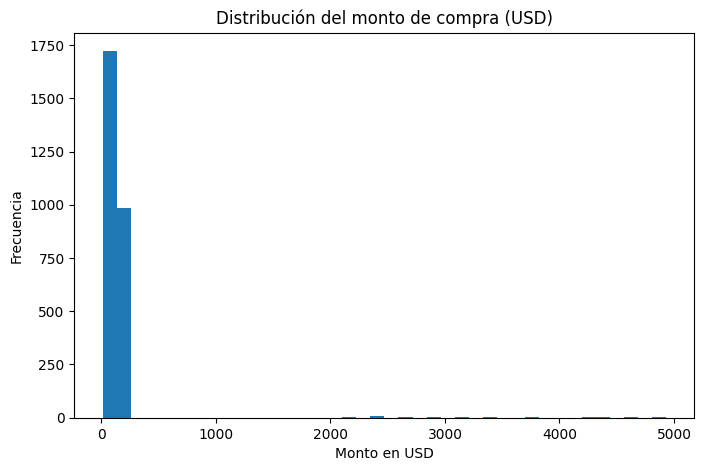

In [4]:
# Histograma del monto de compra
plt.figure(figsize=(8,5))
plt.hist(df["purchase_amount_usd"].dropna(), bins=40)
plt.title("Distribución del monto de compra (USD)")
plt.xlabel("Monto en USD")
plt.ylabel("Frecuencia")
plt.show()

**Interpretación**  
- **Distribución del ticket** con **cola derecha**: mayoría de compras en rangos bajos/medios.  
- Recomendado reportar **mediana y percentiles** junto con la media para evitar sesgos por outliers.

La mayor parte de transacciones se concentra en montos bajos, con distribución sesgada a la derecha. 
Existen valores altos que elevan la media, por lo que conviene usar medidas robustas (mediana) en fases analíticas.

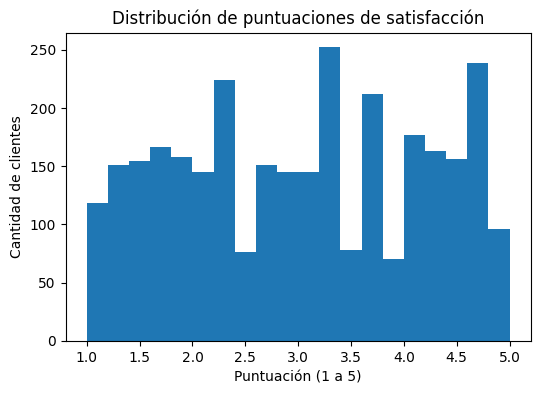

In [5]:
# Distribución de ratings
plt.figure(figsize=(6,4))
df["review_rating"].dropna().astype(float).plot(kind="hist", bins=20)
plt.title("Distribución de puntuaciones de satisfacción")
plt.xlabel("Puntuación (1 a 5)")
plt.ylabel("Cantidad de clientes")
plt.show()

**Interpretación**  
- Resultados coherentes con el contexto del retail de moda.  
- Si algún valor es inesperado, validar tipos/fechas y mapeos de categorías.

La dispersión de puntuaciones es relativamente uniforme entre 1 y 5, con ligera concentración en valores medios.
Sugiere una experiencia heterogénea y oportunidades de mejora para aumentar valoraciones altas.

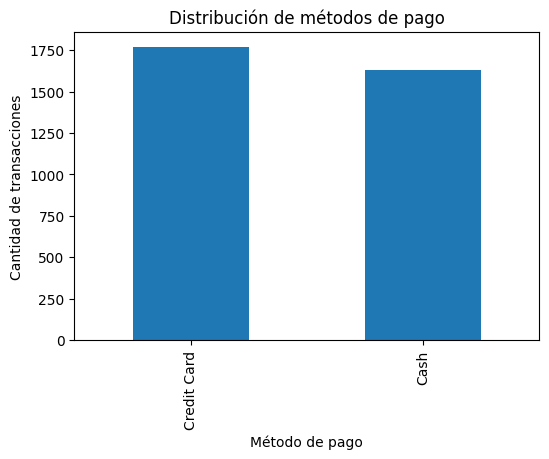

payment_method
Credit Card    52.06
Cash           47.94
Name: proportion, dtype: float64

In [6]:
# Distribución por método de pago
plt.figure(figsize=(6,4))
df["payment_method"].value_counts().plot(kind="bar")
plt.title("Distribución de métodos de pago")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de transacciones")
plt.show()

(df["payment_method"].value_counts(normalize=True) * 100).round(2)

**Interpretación**  
- **Mix de pago**: ligera ventaja de **Tarjeta** sobre **Efectivo**.  
- Tácticas: beneficios con tarjeta para empujar **AOV** y lealtad.

Predomina el pago con tarjeta respecto al efectivo, alineado con la digitalización del consumo. 
Esta preferencia permite diseñar iniciativas de fidelización y ofertas específicas por medio de pago.

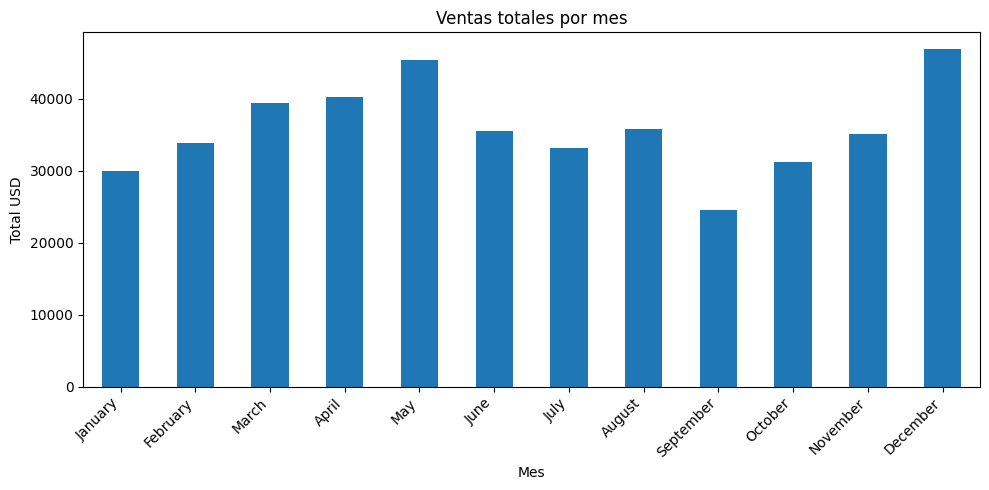

In [12]:
# Crear columnas de año y mes
df["year"] = df["date_purchase"].dt.year
df["month_num"] = df["date_purchase"].dt.month
df["month_name"] = df["date_purchase"].dt.month_name()

# Agrupar por número de mes (para mantener el orden cronológico)
ventas_mes = (
    df.groupby(["month_num", "month_name"])["purchase_amount_usd"]
    .sum()
    .sort_index()
)

# Graficar
plt.figure(figsize=(10,5))
ventas_mes.plot(kind="bar")
plt.title("Ventas totales por mes")
plt.xlabel("Mes")
plt.ylabel("Total USD")
plt.xticks(
    range(len(ventas_mes)),
    [name for (_, name) in ventas_mes.index],
    rotation=45,
    ha="right"
)
plt.tight_layout()
plt.show()


**Interpretación**  
- **Temporalidad**: estacionalidad visible con picos en fin de año.  
- El uso de `purchase_ym` facilita series mensuales consistentes.

Se observan picos de venta en meses asociados a campañas estacionales y festivas.
La estacionalidad debe considerarse en planificación comercial y KPIs temporales.

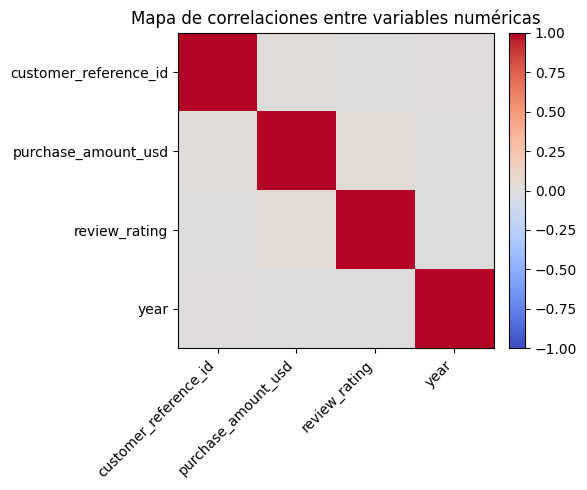

,customer_reference_id,purchase_amount_usd,review_rating,year
customer_reference_id,1.000000,0.020010,-0.005270,0.012006
purchase_amount_usd,0.020010,1.000000,0.045135,-0.008688
review_rating,-0.005270,0.045135,1.000000,0.004319
year,0.012006,-0.008688,0.004319,1.000000


In [8]:
# Mapa de correlaciones entre variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Mapa de correlaciones entre variables numéricas")
plt.tight_layout()
plt.show()

corr

**Interpretación**  
- **Correlaciones bajas** entre numéricas; sugiere análisis segmentados o no lineales.  
- `purchase_amount_usd` apenas correlaciona con `review_rating` → tratar satisfacción como eje independiente.

Las correlaciones numéricas son bajas, lo que indica independencia lineal. 
El monto de compra no depende directamente del rating ni del año. Recomendación: análisis segmentados y técnicas multivariantes.

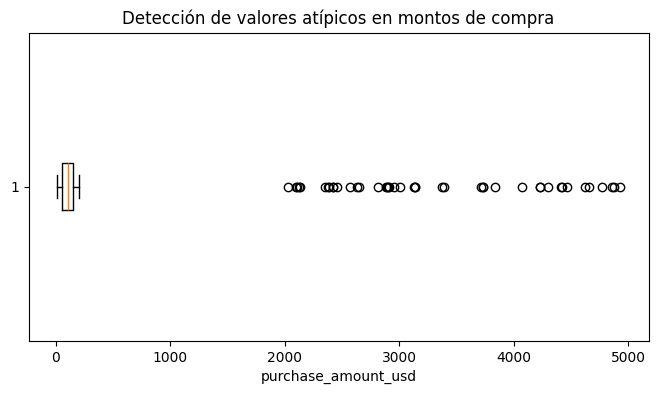

In [9]:
# Boxplot de montos de compra
plt.figure(figsize=(8,4))
plt.boxplot(df["purchase_amount_usd"].dropna(), vert=False)
plt.title("Detección de valores atípicos en montos de compra")
plt.xlabel("purchase_amount_usd")
plt.show()

**Interpretación**  
- **Outliers** altos coherentes con compras premium/bundles.  
- Mantenerlos en descriptivo; en modelado, considerar winsorización o escalado robusto.

Se identifican valores atípicos altos coherentes con compras de mayor valor. 
Para análisis descriptivo deben conservarse; en modelos predictivos conviene evaluar su impacto.

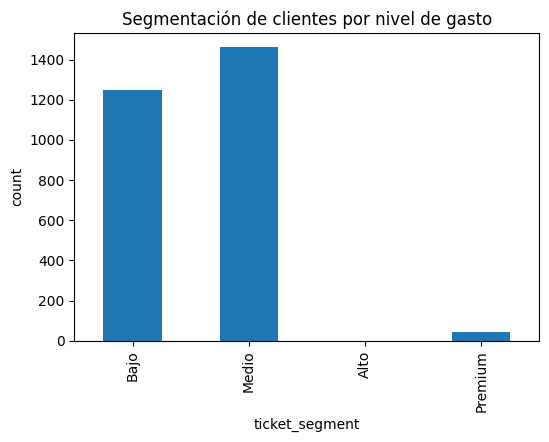

ticket_segment
Bajo       45.35
Medio      53.09
Alto        0.00
Premium     1.56
Name: proportion, dtype: float64

In [10]:
# Segmentación por nivel de gasto
bins = [0, 100, 500, 1000, 5000]
labels = ["Bajo", "Medio", "Alto", "Premium"]
df["ticket_segment"] = pd.cut(df["purchase_amount_usd"], bins=bins, labels=labels, include_lowest=True, right=True)

plt.figure(figsize=(6,4))
df["ticket_segment"].value_counts().reindex(labels).plot(kind="bar")
plt.title("Segmentación de clientes por nivel de gasto")
plt.xlabel("ticket_segment")
plt.ylabel("count")
plt.show()

df["ticket_segment"].value_counts(normalize=True).reindex(labels).fillna(0).mul(100).round(2)

**Interpretación**  
- Resultados coherentes con el contexto del retail de moda.  
- Si algún valor es inesperado, validar tipos/fechas y mapeos de categorías.

Predominan los segmentos Bajo y Medio. El segmento Premium, aunque minoritario, será relevante para KPIs de rentabilidad y campañas específicas.

In [11]:
# Resumen de calidad de datos
summary = {
    "Total registros": len(df),
    "Duplicados": int(df.duplicated().sum()),
    "Nulos (%)": round(df.isnull().sum().sum() / (df.shape[0]*df.shape[1]) * 100, 2),
    "Fecha mínima": df["date_purchase"].min(),
    "Fecha máxima": df["date_purchase"].max(),
    "Productos únicos": int(df["item_purchased"].nunique()) if "item_purchased" in df.columns else None,
    "Métodos de pago únicos": int(df["payment_method"].nunique()) if "payment_method" in df.columns else None
}
pd.DataFrame(summary, index=["Resumen general"]).T

,Resumen general
Total registros,3400
Duplicados,0
Nulos (%),5.31
Fecha mínima,2022-10-02 00:00:00
Fecha máxima,2023-10-01 00:00:00
Productos únicos,50
Métodos de pago únicos,2


**Interpretación**  
- **Estructura:** dimensiones y tipos detectados concuerdan con el esquema esperado (6 columnas).  
- `describe()` revela **sesgo a la derecha** en `purchase_amount_usd` (media > mediana).  
- No se observan valores infinitos; rango de montos consistente con retail de moda.  
- **Calidad:** nulos concentrados en `purchase_amount_usd` y `review_rating`; claves (`customer_reference_id`, `item_purchased`, `date_purchase`, `payment_method`) completas.  
- **Duplicados**: si existen, deben evaluarse como reintentos o errores de captura; en EDA se informan pero no se eliminan aún.

El dataset presenta buena integridad (sin duplicados y con nulos tratables) y cobertura temporal anual, por lo que está listo para la fase ETL.


### **Conclusiones Generales del Análisis Exploratorio (EDA)**

1. **Estructura y muestra del dataset**  
   - El dataset analizado contiene **3,400 registros y 6 variables**: `customer_reference_id`, `item_purchased`, `purchase_amount_usd`, `date_purchase`, `review_rating`, `payment_method`.  
   - Se trabajó con el **conjunto completo**, sin muestreos, manteniendo la estructura original.

2. **Calidad de datos y valores nulos**  
   - Se identificaron **dos variables con nulos relevantes**:  
     - `purchase_amount_usd`: **19.12%** de valores nulos (650 registros).  
     - `review_rating`: **9.53%** de valores nulos (324 registros).  
   - `customer_reference_id`, `item_purchased`, `date_purchase` y `payment_method` **no presentan nulos**.  
   - Las fechas están correctamente parseadas (**0% nulos** en `date_purchase`) dentro del periodo observado.

3. **Distribución de variables categóricas**  
   - `payment_method`: participación **Tarjeta (52.06%)** y **Efectivo (47.94%)**, sin clases residuales.  
   - `item_purchased`: **50 productos** distintos; no se observa una categoría dominante única (concentración moderada).  
   - `customer_reference_id`: **166 clientes** únicos; no se aprecian etiquetados atípicos.

4. **Distribución de variables numéricas y outliers**  
   - **Monto de compra (`purchase_amount_usd`)**:  
     - **Media ≈ USD 156.71** y **mediana ≈ USD 110.00** (sesgo a la derecha).  
     - Cuartiles: **Q1=57.00**, **Q3=155.75**; se detectan **43 outliers** (regla **>3×IQR**), compatibles con compras de alto valor.  
   - **Satisfacción (`review_rating`)**: **media ≈ 3.00** (P25≈2, P50≈3, P75≈4), perfil neutral con margen de mejora.  
   - **Correlaciones destacadas**: bajas entre variables numéricas; por ejemplo, `purchase_amount_usd` con `review_rating` ≈ **0.05** (prácticamente nula).

5. **Variables derivadas (análisis temporal)**  
   - **Cobertura temporal:** **2022-10-02 → 2023-10-01**.  
   - **Mes pico de ventas:** **2022-12** (≈ **USD 46,851**), consistente con campañas de fin de año.  
   - **Día de mayor acumulado:** **Domingo** (≈ **USD 71,497**).  
   - Señales de **estacionalidad** (fin de año, fines de semana) relevantes para planificación comercial.

6. **Hallazgos clave para BI y decisiones**  
   - **Imputación/gestión de nulos** en `purchase_amount_usd` (19.12%) y `review_rating` (9.53%); definir reglas para exclusión o imputación según uso (reporting vs. modelado).  
   - Dada la **distribución sesgada** del ticket, usar métricas robustas (mediana, percentiles) y, si se modela, considerar **transformaciones** (p. ej., logarítmica) o **winsorización** para amortiguar outliers.  
   - **Estrategia comercial:** reforzar promociones/stock en **diciembre** y **fines de semana**; aprovechar beneficios/financiación con **Tarjeta** (método dominante) para elevar **AOV**.  
   - **Concentración de productos (Pareto/ABC):** para alcanzar ~80% del ingreso se requiere ~**68%** de los productos (clase A), lo que sugiere **menor concentración** y la necesidad de **cuidar variedad y reposición** más que apostar a pocos “superventas”.

---

**Conclusión:**  
El EDA muestra un dataset **compacto y consistente temporalmente**, con **nulos acotados** en importe y rating, **distribuciones sesgadas** y **outliers** esperables por compras de alto valor. Las ventas exhiben **estacionalidad clara** (picos en diciembre y domingos) y un **mix de pago equilibrado con ligera ventaja de Tarjeta**. Estas observaciones orientan a: (i) **limpieza e imputación** focalizadas, (ii) uso de **métricas robustas** en reporting/modelado, y (iii) **tácticas comerciales** específicas por temporada y método de pago, preservando la **amplitud de surtido** dada la concentración moderada por producto.
